In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 13.9 MB/s eta 0:00:00


In [8]:
from ultralytics import YOLO

# Load the YOLO11 model
model = YOLO("/content/best.pt")

# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolo11n.onnx'

# Load the exported ONNX model
onnx_model = YOLO("/content/best.onnx")

# Run inference
#results = onnx_model("https://ultralytics.com/images/bus.jpg")

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 227.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 205.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 233.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 146.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.7s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: sta

In [9]:
from flask import Flask, request, jsonify
from ultralytics import YOLO
import os

app = Flask(__name__)

# Cargar el modelo
model = YOLO("best.pt")  # Ruta al modelo entrenado

@app.route('/predict', methods=['POST'])
def predict():
    # Verificar que se reciba una imagen
    if 'image' not in request.files:
        return jsonify({"error": "No image uploaded"}), 400

    file = request.files['image']

    # Guardar temporalmente la imagen
    file_path = os.path.join("uploads", file.filename)
    file.save(file_path)

    # Realizar la predicción
    results = model.predict(source=file_path)
    predictions = results[0].boxes.xyxy.tolist()  # Coordenadas de las cajas

    # Borrar la imagen temporal
    os.remove(file_path)

    # Devolver resultados
    return jsonify({"predictions": predictions})

if __name__ == '__main__':
    os.makedirs("uploads", exist_ok=True)  # Crear carpeta temporal
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


In [12]:
!python /content/app.py

In [16]:
!pip install flask-ngrok ultralytics torch

Saving ech81.jpg to ech81.jpg

image 1/1 /content/ech81.jpg: 448x640 1 echado, 171.5ms
Speed: 2.7ms preprocess, 171.5ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict9


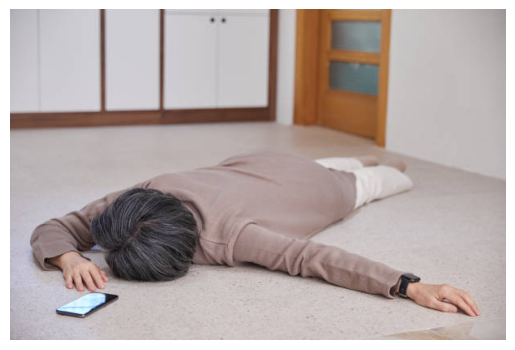

In [27]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Cargar el modelo YOLOv8
model = YOLO("/content/best.pt")

# Subir una imagen
from google.colab import files
uploaded = files.upload()

# Realizar predicción
image_path = list(uploaded.keys())[0]
results = model.predict(source=image_path, save=True)

# Mostrar los resultados
result_image_path = results[0].path  # Ruta de la imagen con predicciones
image = Image.open(result_image_path)
plt.imshow(image)
plt.axis("off")
plt.show()